# Project

# Analyzing the sentiment of Tesla over the years

## Data Collection

In [1]:
!pip install praw

In [2]:
import praw
import pandas as pd

In [3]:
# Read-only Reddit Instances
reddit = praw.Reddit(
    client_id = "SymOd5v5_nZIyZZrSa0XOA",
    client_secret = "xvHpUr5NxdezFIYaPFVU1NTE0JJQDA",
    user_agent = "Finding posts about Tesla by Duble_Rankinshaw"
)

In [4]:
# Access the teslamotors subreddit
subreddit = reddit.subreddit("teslamotors")

In [5]:
# This takes a long time to load
# Collect all of the Tesla reddit posts from the Tesla subreddit
# headlines = []

# for post in subreddit.new(limit = None):
    # tesla_news_item = {"title": post.title, "url": post.url, "score": post.score, "utc": post.created_utc}
    # post info data
    # print("----------------")
    # print(post.title)
    # print(post.url)
    # print(post.score)
    # print(post.created_utc)
    # headlines.append(tesla_news_item)
    
# print(len(headlines))

In [6]:
# Put the reddit tesla posts into a dataframe
# tesla_posts_df = pd.DataFrame(headlines)
# tesla_posts_df.head()

In [7]:
# Convert all of PRAW tesla reddit posts data into csv format
# tesla_posts_df.to_csv("reddit_tesla_headlines_data.csv", header = True, encoding = "utf-8", index = True)

In [8]:
# Read all of the tesla reddit data in the csv format
import pandas as pd
reddit_tesla_data = pd.read_csv("reddit_tesla_headlines_data.csv")
reddit_tesla_data.head()

,Unnamed: 0,title,url,score,utc
0,0,@Tesla: RT @teslaeurope: A new eraLaunching in...,https://twitter.com/Tesla/status/1910393280136...,0,1.744309e+09
1,1,@Tesla: Our goal is to make service seamless i...,https://x.com/tesla_na/status/1909887593988174...,0,1.744200e+09
2,2,Tesla Appears to Have Dropped/Discontinued Its...,https://shop.tesla.com/category/charging,118,1.744152e+09
3,3,@Tesla: Has science gone too far? https://t.co...,https://twitter.com/Tesla/status/1909687796266...,0,1.744140e+09
4,4,2026 Model Y has a new 12.8v Low Voltage LFP b...,https://www.youtube.com/watch?v=QJsy1ay6tXs,42,1.744122e+09


## Preprocessing

In [9]:
# Preprocessing Task: Clean the reddit data by dropping the column "Unnamed: 0"
reddit_tesla_data_clean = reddit_tesla_data.drop(columns = "Unnamed: 0")
reddit_tesla_data_clean.head()

,title,url,score,utc
0,@Tesla: RT @teslaeurope: A new eraLaunching in...,https://twitter.com/Tesla/status/1910393280136...,0,1.744309e+09
1,@Tesla: Our goal is to make service seamless i...,https://x.com/tesla_na/status/1909887593988174...,0,1.744200e+09
2,Tesla Appears to Have Dropped/Discontinued Its...,https://shop.tesla.com/category/charging,118,1.744152e+09
3,@Tesla: Has science gone too far? https://t.co...,https://twitter.com/Tesla/status/1909687796266...,0,1.744140e+09
4,2026 Model Y has a new 12.8v Low Voltage LFP b...,https://www.youtube.com/watch?v=QJsy1ay6tXs,42,1.744122e+09


In [10]:
# create the +/- (positive/negative) label for the Tesla Reddit Posts
reddit_tesla_headlines = pd.read_csv("reddit_tesla_headlines_data.csv")
reddit_tesla_headlines.head()

,Unnamed: 0,title,url,score,utc
0,0,@Tesla: RT @teslaeurope: A new eraLaunching in...,https://twitter.com/Tesla/status/1910393280136...,0,1.744309e+09
1,1,@Tesla: Our goal is to make service seamless i...,https://x.com/tesla_na/status/1909887593988174...,0,1.744200e+09
2,2,Tesla Appears to Have Dropped/Discontinued Its...,https://shop.tesla.com/category/charging,118,1.744152e+09
3,3,@Tesla: Has science gone too far? https://t.co...,https://twitter.com/Tesla/status/1909687796266...,0,1.744140e+09
4,4,2026 Model Y has a new 12.8v Low Voltage LFP b...,https://www.youtube.com/watch?v=QJsy1ay6tXs,42,1.744122e+09


# Tesla sentiment visualization

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Loading Data

In [12]:
# Metadata
# Unnamed: 0: Extra index column from the file.
# id: Unique ID of the post.
# title: Title of the Reddit post.
# selftext: Main text of the Reddit post.
# subreddit: The specific Reddit community.
# url: Web address of the post.
# created_utc: Time the post was created (in UTC) date + time.
# state: Geographical state related to the post.
# human_label: Sentiment label manually assigned.
# vader_label: Sentiment label assigned by VADER (VADER_BERT_sentiment_classifier.ipynb).
# sentiment_score: Numerical sentiment score.
# combined_text: Title and main text combined.
# bert_label: Sentiment label assigned by BERT. (VADER_BERT_sentiment_classifier.ipynb).

In [13]:
# Loading the labeled geolocation Tesla data
tesla_geo_data = pd.read_csv("labeled_tesla_geo_data.csv", parse_dates = ['created_utc'])
tesla_geo_data.head().head()

,Unnamed: 0,id,title,selftext,subreddit,url,created_utc,state,human_label,vader_label,sentiment_score,combined_text,bert_label
0,0,1jqjxz2,April 5th. HANDS OFF PROTEST. Which one to go to?,Looks llike there are there are no less than 2...,newjersey,https://www.reddit.com/r/newjersey/comments/1j...,2025-04-03 14:29:00,newjersey,0.0,0.0,-0.6705,April 5th. HANDS OFF PROTEST. Which one to go ...,0
1,1,1jq41mz,Texas lawmakers push to ramp up penalties for ...,NaN,texas,https://www.expressnews.com/politics/texas/art...,2025-04-03 00:07:00,texas,2.0,0.0,-0.5106,Texas lawmakers push to ramp up penalties for ...,0
2,2,1jpzumu,"Tesla, one of Texas' top brands, saw its value...",NaN,texas,https://www.houstonchronicle.com/business/arti...,2025-04-02 21:06:00,texas,0.0,2.0,0.4939,"Tesla, one of Texas' top brands, saw its value...",2
3,3,1jpzmv5,Hands Off protest in Danville on April 5th (al...,NaN,Virginia,https://www.mobilize.us/handsoff/event/770883/,2025-04-02 20:57:00,virginia,1.0,0.0,-0.2500,Hands Off protest in Danville on April 5th (al...,0
4,4,1jpzlm3,Tesla cheese meme IRL,NaN,wisconsin,https://i.redd.it/ailsydacjhse1.jpeg,2025-04-02 20:55:00,wisconsin,0.0,1.0,0.0000,Tesla cheese meme IRL,1


# Clean the data

In [14]:
tesla_geo_data_clean = tesla_geo_data.drop(columns = ["Unnamed: 0","id"])
tesla_geo_data_clean.head()

,title,selftext,subreddit,url,created_utc,state,human_label,vader_label,sentiment_score,combined_text,bert_label
0,April 5th. HANDS OFF PROTEST. Which one to go to?,Looks llike there are there are no less than 2...,newjersey,https://www.reddit.com/r/newjersey/comments/1j...,2025-04-03 14:29:00,newjersey,0.0,0.0,-0.6705,April 5th. HANDS OFF PROTEST. Which one to go ...,0
1,Texas lawmakers push to ramp up penalties for ...,NaN,texas,https://www.expressnews.com/politics/texas/art...,2025-04-03 00:07:00,texas,2.0,0.0,-0.5106,Texas lawmakers push to ramp up penalties for ...,0
2,"Tesla, one of Texas' top brands, saw its value...",NaN,texas,https://www.houstonchronicle.com/business/arti...,2025-04-02 21:06:00,texas,0.0,2.0,0.4939,"Tesla, one of Texas' top brands, saw its value...",2
3,Hands Off protest in Danville on April 5th (al...,NaN,Virginia,https://www.mobilize.us/handsoff/event/770883/,2025-04-02 20:57:00,virginia,1.0,0.0,-0.2500,Hands Off protest in Danville on April 5th (al...,0
4,Tesla cheese meme IRL,NaN,wisconsin,https://i.redd.it/ailsydacjhse1.jpeg,2025-04-02 20:55:00,wisconsin,0.0,1.0,0.0000,Tesla cheese meme IRL,1


In [15]:
tesla_geo_data_clean.columns

Index(['title', 'selftext', 'subreddit', 'url', 'created_utc', 'state',
       'human_label', 'vader_label', 'sentiment_score', 'combined_text',
       'bert_label'],
      dtype='object')

# Visualizations

## Alter the table

In [16]:
# Convert 'created_utc' to datetime objects
tesla_geo_data_clean["created_utc"] = pd.to_datetime(tesla_geo_data_clean["created_utc"]) 

In [17]:
# Extract the date part in created_utc column and create a new 'date' column
tesla_geo_data_clean["date"] = tesla_geo_data_clean["created_utc"].dt.date

In [18]:
tesla_geo_data_clean.head()

,title,selftext,subreddit,url,created_utc,state,human_label,vader_label,sentiment_score,combined_text,bert_label,date
0,April 5th. HANDS OFF PROTEST. Which one to go to?,Looks llike there are there are no less than 2...,newjersey,https://www.reddit.com/r/newjersey/comments/1j...,2025-04-03 14:29:00,newjersey,0.0,0.0,-0.6705,April 5th. HANDS OFF PROTEST. Which one to go ...,0,2025-04-03
1,Texas lawmakers push to ramp up penalties for ...,NaN,texas,https://www.expressnews.com/politics/texas/art...,2025-04-03 00:07:00,texas,2.0,0.0,-0.5106,Texas lawmakers push to ramp up penalties for ...,0,2025-04-03
2,"Tesla, one of Texas' top brands, saw its value...",NaN,texas,https://www.houstonchronicle.com/business/arti...,2025-04-02 21:06:00,texas,0.0,2.0,0.4939,"Tesla, one of Texas' top brands, saw its value...",2,2025-04-02
3,Hands Off protest in Danville on April 5th (al...,NaN,Virginia,https://www.mobilize.us/handsoff/event/770883/,2025-04-02 20:57:00,virginia,1.0,0.0,-0.2500,Hands Off protest in Danville on April 5th (al...,0,2025-04-02
4,Tesla cheese meme IRL,NaN,wisconsin,https://i.redd.it/ailsydacjhse1.jpeg,2025-04-02 20:55:00,wisconsin,0.0,1.0,0.0000,Tesla cheese meme IRL,1,2025-04-02


In [19]:
tesla_data_groupby_state = tesla_geo_data_clean.groupby(["state", "date"])

# Print the tesla geo data grouped by the state and the date
# This takes a long time to load
# for state, group in tesla_data_groupby_state:
#     print(f"Data for state and data: {state}")
#     display(state, group)


In [20]:
# filter by vader_label = 2.0 Positive
# vader_label = 1.0 Neutral
# vader_label = 0.0 Negative
# Groupby the date, state, and vader_label column
x = tesla_geo_data_clean[['date', 'state', 'vader_label']]
tesla_data_filter = x.groupby(['state', 'date']).value_counts().unstack(fill_value = 0)
tesla_data_filter.head()
tesla_data_filter["diff"] = tesla_data_filter[2.0] - tesla_data_filter[0.0]
tesla_data_filter.head()

vader_label          0.0  1.0  2.0  diff
state    date                           
Kentucky 2015-02-04    0    1    0     0
         2016-04-06    0    0    1     1
         2019-09-27    0    1    0     0
         2021-05-24    0    0    1     1
         2021-12-17    1    0    0    -1

In [21]:
tesla_reset_data = tesla_data_filter.reset_index()

In [38]:
tesla_reset_data[tesla_reset_data.state == 'kentucky']

vader_label,state,date,0.0,1.0,2.0,diff,region
1742,kentucky,2013-02-28,0,1,0,0,South
1743,kentucky,2013-03-05,0,0,1,1,South
1744,kentucky,2014-05-22,0,0,1,1,South
1745,kentucky,2015-10-12,0,0,1,1,South
1746,kentucky,2016-01-06,0,1,0,0,South
1747,kentucky,2016-02-04,1,0,0,-1,South
1748,kentucky,2017-12-07,0,1,0,0,South
1749,kentucky,2017-12-20,0,1,0,0,South
1750,kentucky,2018-02-06,0,0,1,1,South
1751,kentucky,2018-02-08,0,1,0,0,South


In [39]:
tesla_reset_data[0.0]

0       0
1       0
2       0
3       0
4       1
       ..
5380    1
5381    0
5382    0
5383    0
5384    1
Name: 0.0, Length: 5385, dtype: int64

In [44]:
tesla_reset_data.state.unique()

array(['Kentucky', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa',
       'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'nebraska', 'nevada', 'newhampshire',
       'newjersey', 'newmexico', 'newyork', 'northcarolina',
       'northdakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhodeisland', 'southcarolina', 'southdakota', 'tennessee',
       'texas', 'utah', 'vermont', 'virginia', 'washington',
       'westvirginia', 'wisconsin', 'wyoming'], dtype=object)

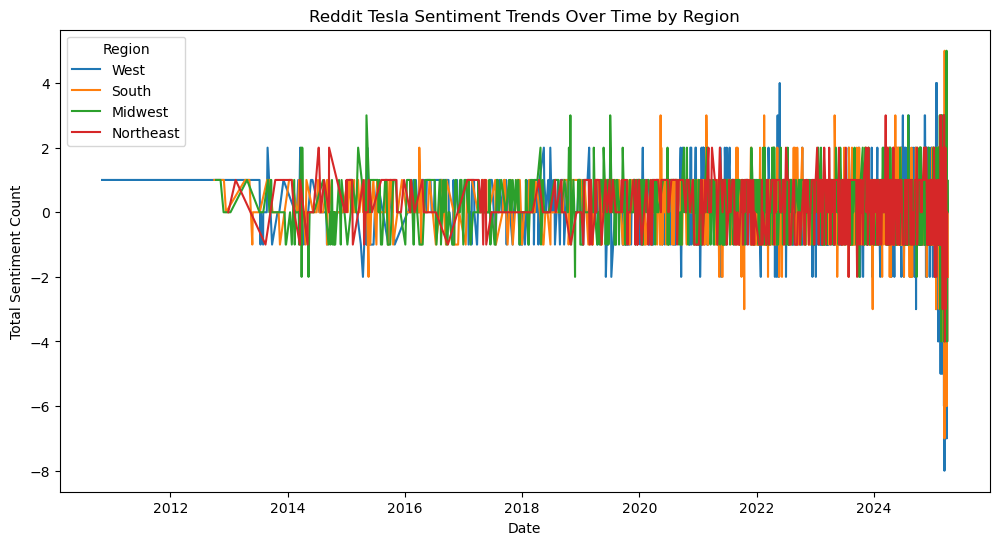

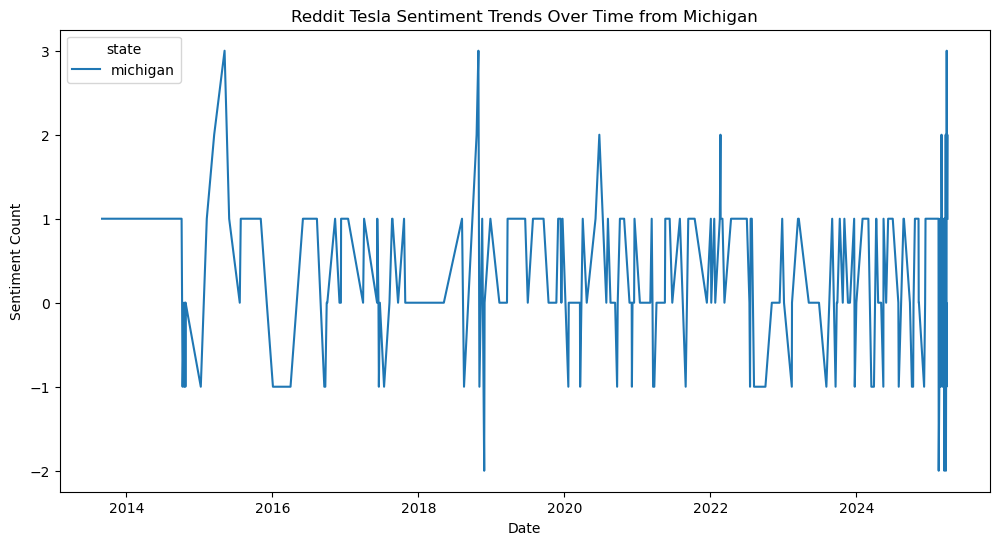

In [45]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# Assuming your DataFrame is named tesla_reset_data
# and has columns: 'index', 'state', 'date', 'vader_label_negative',
# 'vader_label_neutral', 'vader_label_positive', 'diff'

# states list
states = [tesla_reset_data.state]
# regions?
# Define a dictionary to map states to regions
state_to_region = {'michigan': 'Midwest', 'ohio': 'Midwest', 'illinois': 'Midwest', 'wisconsin': 'Midwest', 'indiana': 'Midwest',
    'minnesota': 'Midwest', 'iowa': 'Midwest', 'missouri': 'Midwest', 'nebraska': 'Midwest', 'north dakota': 'Midwest',
    'south dakota': 'Midwest', 'kansas': 'Midwest',

    'california': 'West', 'oregon': 'West', 'washington': 'West', 'nevada': 'West', 'idaho': 'West',
    'montana': 'West', 'wyoming': 'West', 'utah': 'West', 'colorado': 'West', 'arizona': 'West',
    'alaska': 'West', 'hawaii': 'West',

    'new york': 'Northeast', 'pennsylvania': 'Northeast', 'new jersey': 'Northeast', 'maine': 'Northeast',
    'vermont': 'Northeast', 'new hampshire': 'Northeast', 'massachusetts': 'Northeast', 'rhode island': 'Northeast',
    'connecticut': 'Northeast', 'delaware': 'Northeast', 'maryland': 'Northeast',

    'virginia': 'South', 'west virginia': 'South', 'north carolina': 'South', 'south carolina': 'South',
    'georgia': 'South', 'florida': 'South', 'alabama': 'South', 'mississippi': 'South', 'tennessee': 'South',
    'Kentucky': 'South', 'arkansas': 'South', 'louisiana': 'South', 'texas': 'South', 'oklahoma': 'South'}

# Create a 'region' column based on the 'state' column
tesla_reset_data['region'] = tesla_reset_data['state'].map(state_to_region)

# Group the data by 'date' and 'region' and calculate the sum of 'diff'
region_sentiment = tesla_reset_data.groupby(['date', 'region'])['diff'].sum().reset_index()

# 1. Line Plot of Sentiment Counts Over Time by Region
plt.figure(figsize = (12, 6))
sns.lineplot(data = region_sentiment, x = 'date', y = 'diff', hue = 'region')
plt.title('Reddit Tesla Sentiment Trends Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Total Sentiment Count')
plt.legend(title = 'Region')
plt.show()

# 2. Bar plot with state on the x-axis and Sentiment Count on the y-axis
#fig = px.bar(tesla_reset_data, x = tesla_reset_data['state'].unique(), y = tesla_reset_data['0.0'])

# 3. Overall Sentiment on the x-axis and Sentiment Count on the y-axis


# Convert 'date' column to datetime objects
tesla_reset_data['date'] = pd.to_datetime(tesla_reset_data['date'])
plot_data = tesla_reset_data[tesla_reset_data.state.isin(['michigan'])]

# 1. Line Plot of Sentiment Counts Over Time from Michigan
plt.figure(figsize = (12, 6))
sns.lineplot(data = plot_data, x = 'date', y = 'diff', hue = 'state')
plt.title('Reddit Tesla Sentiment Trends Over Time from Michigan')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')

plt.show()


In [46]:
tesla_reset_data

vader_label,state,date,0.0,1.0,2.0,diff,region
0,Kentucky,2015-02-04,0,1,0,0,South
1,Kentucky,2016-04-06,0,0,1,1,South
2,Kentucky,2019-09-27,0,1,0,0,South
3,Kentucky,2021-05-24,0,0,1,1,South
4,Kentucky,2021-12-17,1,0,0,-1,South
...,...,...,...,...,...,...,...
5380,wyoming,2018-09-19,1,0,0,-1,West
5381,wyoming,2024-01-17,0,0,1,1,West
5382,wyoming,2024-01-22,0,0,1,1,West
5383,wyoming,2025-03-23,0,1,0,0,West
